<a href="https://colab.research.google.com/github/anjalixprakash/Project2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2

Anjali Prakash

Source: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
import pandas as pd


In [3]:
incomedata = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/adult.csv'
dff = pd.read_csv(incomedata)
dff.head()
dff.shape

(48842, 15)

Dataset Description:

1. Source of data
- Kaggle

2. Brief description of data
- This data set shows an individual's income based on various factors.
3. What is the target?
income
4. What does one row represent? (A person? A business? An event? A product?)
- A person

5. Is this a classification or regression problem?
- Classification, as income is split between making more or less than 50k.

6. How many features does the data have?
- 15
7. How many rows are in the dataset?
- 48842

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- There are inconsistencies in the labelling of the education column that may take some time to really clean up.

After reviewing both data sets, I've decided to proceed with the adult income data set! Now let's clean the data.

## Clean data

In [4]:
dff.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Remove unnecessary columns

df = dff.drop('fnlwgt', axis=1)


In [6]:
# Check for duplicate rows
duplicated_rows = df.duplicated()
df.duplicated().sum()


6374

In [7]:
# Remove duplicate rows
df = df.drop_duplicates()

In [8]:
# Get the number of null values for all columns and save as a variable to identify missing values
null_sums = df.isna().sum()
null_sums

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

There are no null values in any columns for us to address, this is likely because all missing values appear to already be addressed as "?".

In [9]:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [10]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for workclass
Private             28312
Self-emp-not-inc     3735
Local-gov            3011
?                    2411
State-gov            1927
Self-emp-inc         1644
Federal-gov          1397
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Value Counts for education
HS-grad         12919
Some-college     9188
Bachelors        6967
Masters          2499
Assoc-voc        1961
11th             1598
Assoc-acdm       1563
10th             1277
7th-8th           931
Prof-school       813
9th               737
12th              618
Doctorate         576
5th-6th           498
1st-4th           242
Preschool          81
Name: education, dtype: int64


Value Counts for marital-status
Married-civ-spouse       19215
Never-married            13360
Divorced                  6218
Separated                 1512
Widowed                   1499
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64


Value Coun

There appears to be no inconsistencies in the categorical columns to be addressed.

## Exploratory Visualizations

In [11]:
#importing useful packages
import seaborn as sns

In [12]:
# Checking dtypes again
df.dtypes

age                 int64
workclass          object
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [13]:
# Discovering which columns are our numerical feature columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Let's create histograms and boxplots for the numerical features in our data set

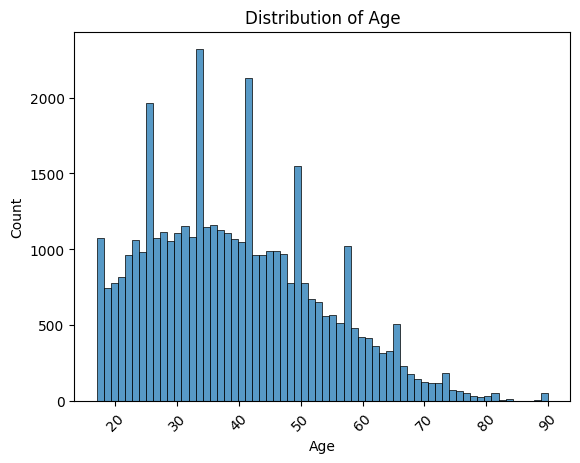

In [14]:
# Histogram for Age
ax = sns.histplot(data=df, x="age")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Age")
ax.set_xlabel("Age");

Text(0.5, 1.0, 'Distribution of Age')

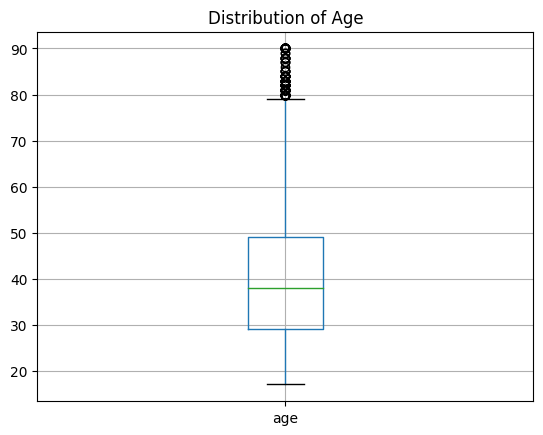

In [15]:
# Boxplot for Age
ax = df.boxplot(column ="age")
ax.set_title("Distribution of Age")


**The average age distribution appears to be between 30-50 for these individuals. However, there are quite a few outliers exceeding 80 years of age.**

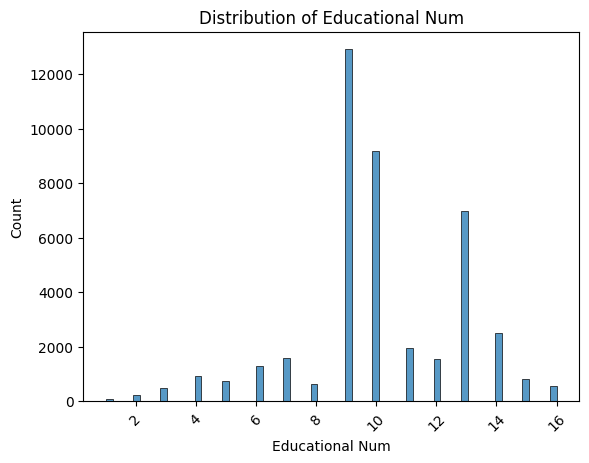

In [16]:
# Histogram for Educational Num
ax = sns.histplot(data=df, x="educational-num")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Educational Num")
ax.set_xlabel("Educational Num");

Text(0.5, 1.0, 'Distribution of Educational Num')

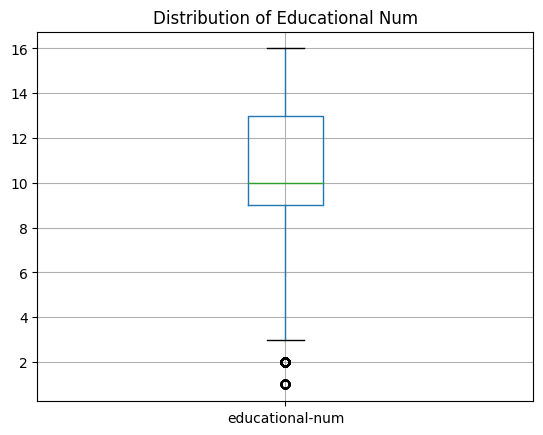

In [17]:
# Boxplot for Educational Num
ax = df.boxplot(column ="educational-num")
ax.set_title("Distribution of Educational Num")


**The educational num appears to be between 9-13, but there are a couple of outliers at 1 and 2.**

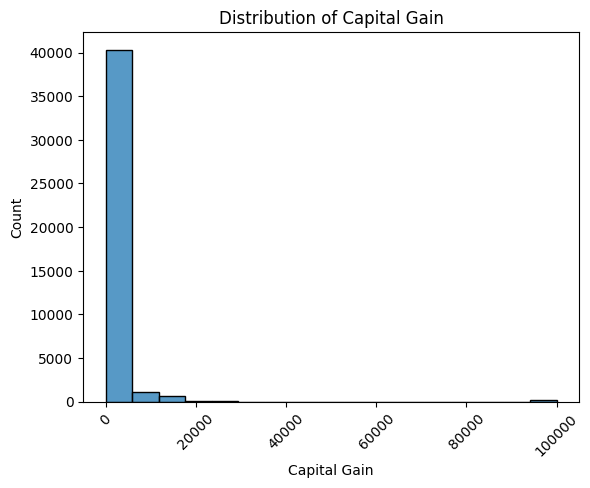

In [18]:
# Histogram for Capital Gain
ax = sns.histplot(data=df, x="capital-gain")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Capital Gain")
ax.set_xlabel("Capital Gain");

Text(0.5, 1.0, 'Distribution of Capital Gain')

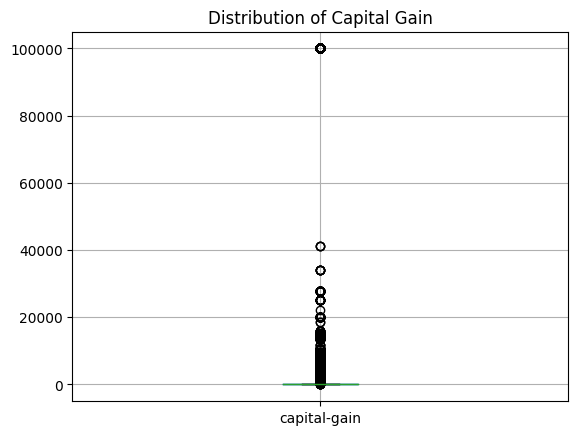

In [19]:
# Boxplot for Educational Num
ax = df.boxplot(column ="capital-gain")
ax.set_title("Distribution of Capital Gain")

**The typical capital gain distribution appears to be $0, however there are outliers spanning anywhere from $1-100000.**

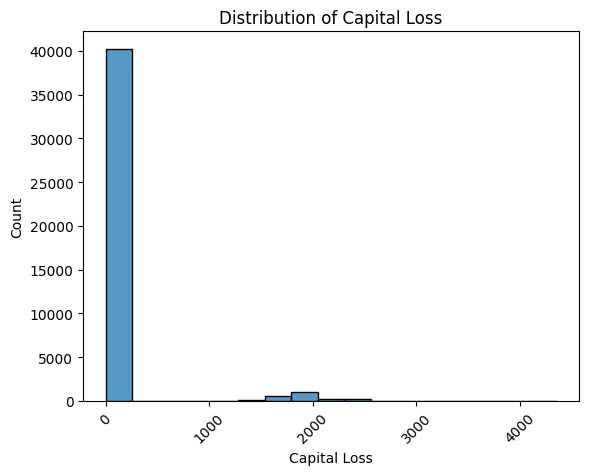

In [20]:
# Histogram for Capital Loss
ax = sns.histplot(data=df, x="capital-loss")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Capital Loss")
ax.set_xlabel("Capital Loss");

Text(0.5, 1.0, 'Distribution of Capital Loss')

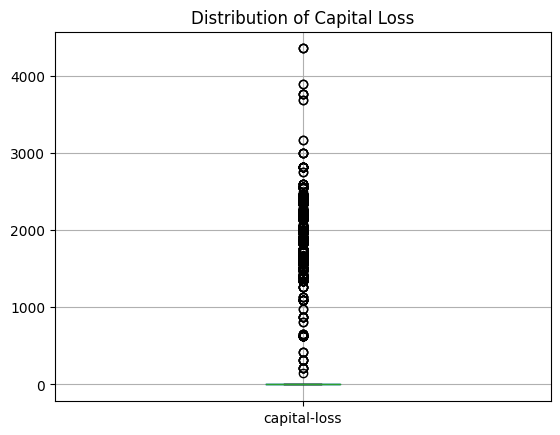

In [21]:
# Boxplot for Capital Loss
ax = df.boxplot(column ="capital-loss")
ax.set_title("Distribution of Capital Loss")

**The typical capital loss distribution appears to be $0, however there are outliers spanning anywhere from $1-4500.**

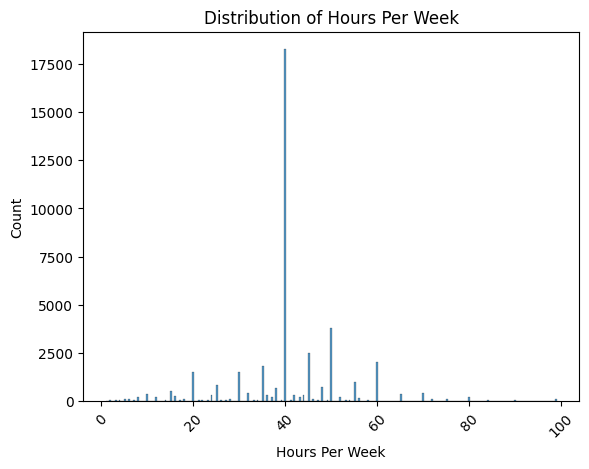

In [22]:
# Histogram for Hours Per Week
ax = sns.histplot(data=df, x="hours-per-week")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Hours Per Week")
ax.set_xlabel("Hours Per Week");

Text(0.5, 1.0, 'Distribution of Hours Per Week')

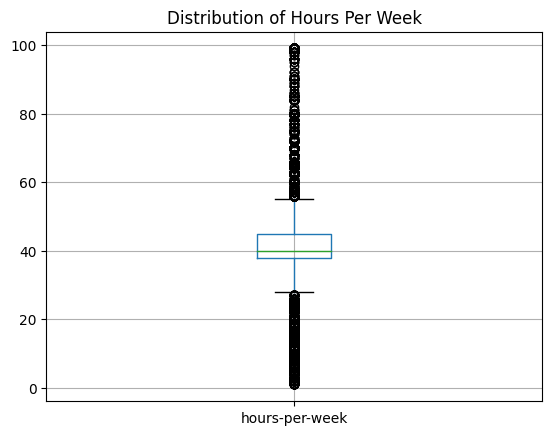

In [23]:
# Boxplot for Hours Per Week
ax = df.boxplot(column ="hours-per-week")
ax.set_title("Distribution of Hours Per Week")

**The typical hours per week worked appears to be between 38-45 hours, however there are outliers of less than 25 hours and greater than 55 hours per week.**

In [24]:
# Discovering which columns are our categorical feature columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

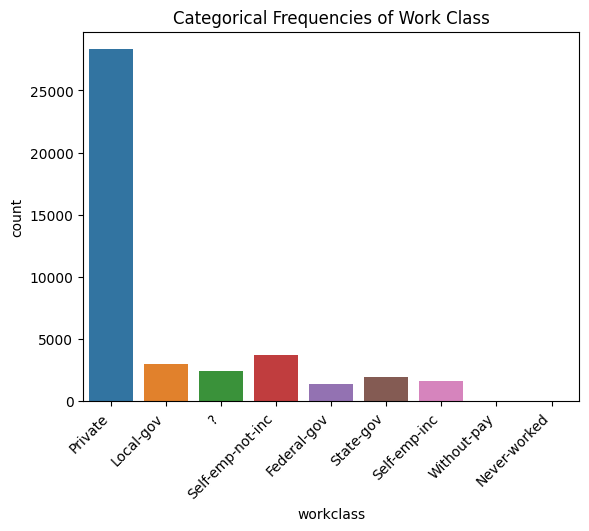

In [25]:
# Univariate countplot of Work Class
ax = sns.countplot(data=df, x='workclass')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Work Class");

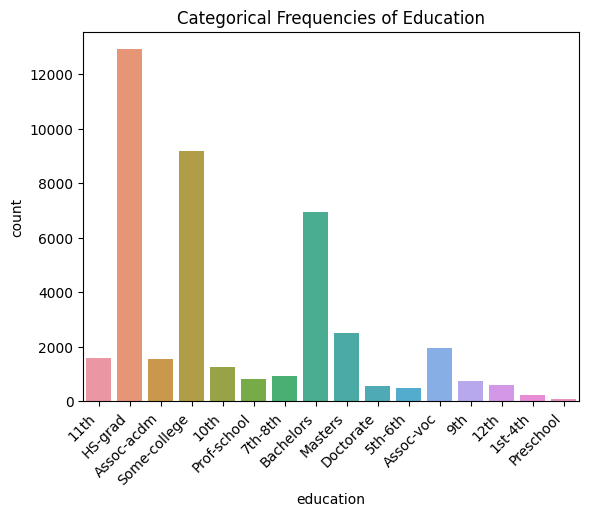

In [26]:
# Univariate countplot of Education
ax = sns.countplot(data=df, x='education')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Education");

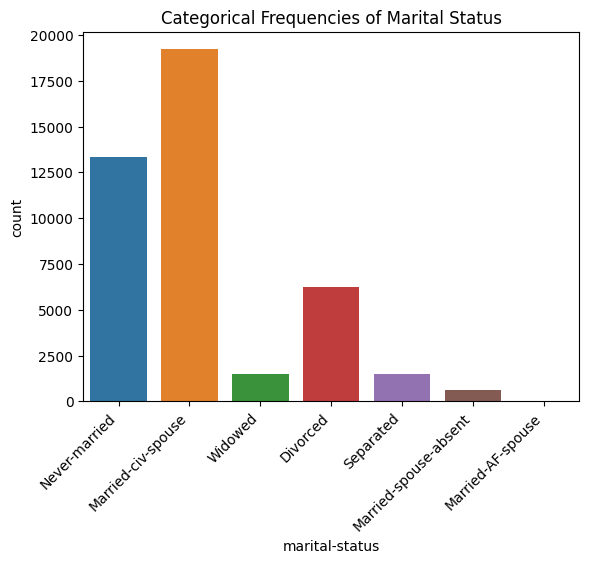

In [27]:
# Univariate countplot of Marital Status
ax = sns.countplot(data=df, x='marital-status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Marital Status");

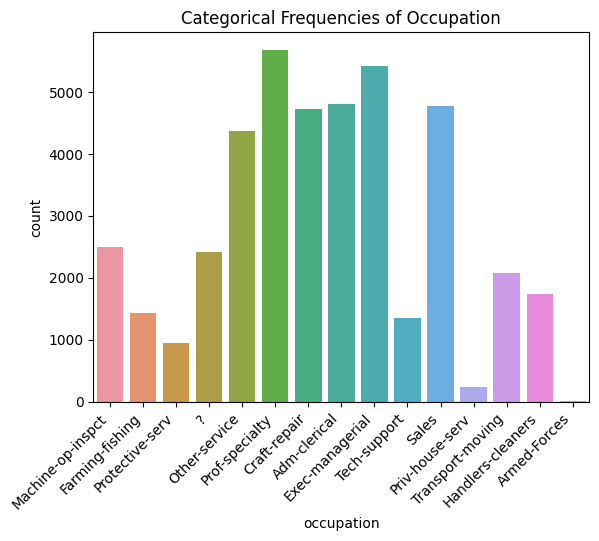

In [28]:
# Univariate countplot of Occupation
ax = sns.countplot(data=df, x='occupation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Occupation");

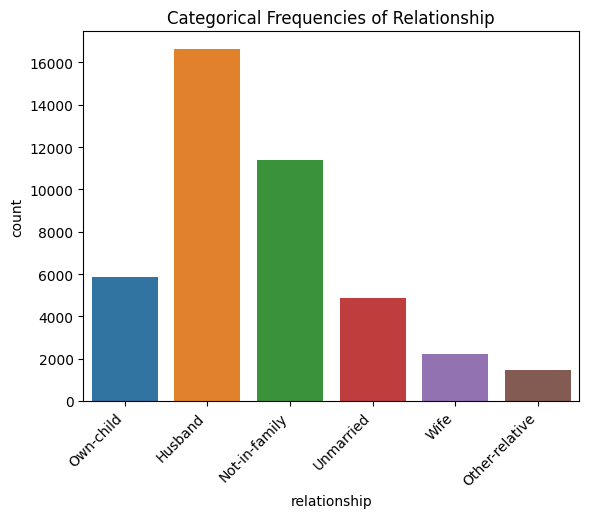

In [29]:
# Univariate countplot of Relationship
ax = sns.countplot(data=df, x='relationship')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Relationship");

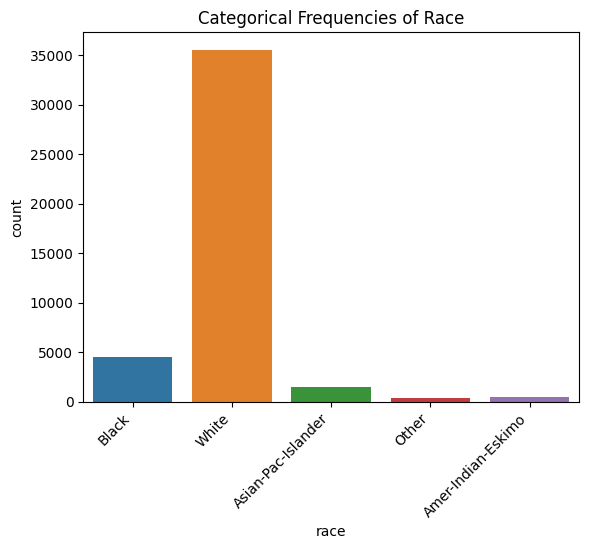

In [30]:
# Univariate countplot of Race
ax = sns.countplot(data=df, x='race')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Race");

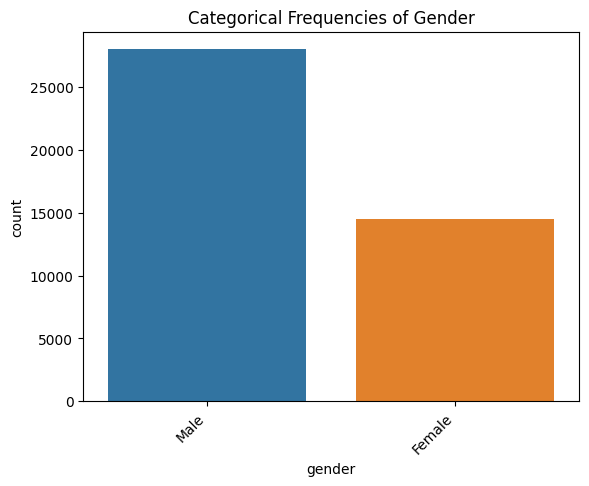

In [31]:
# Univariate countplot of Item Fat Content
ax = sns.countplot(data=df, x='gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Gender");

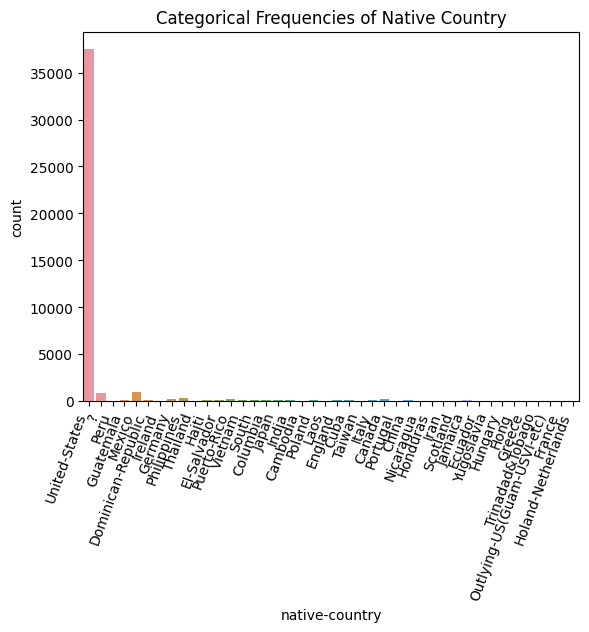

In [32]:
# Univariate countplot of Native Country
ax = sns.countplot(data=df, x='native-country')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right');
ax.set_title("Categorical Frequencies of Native Country");

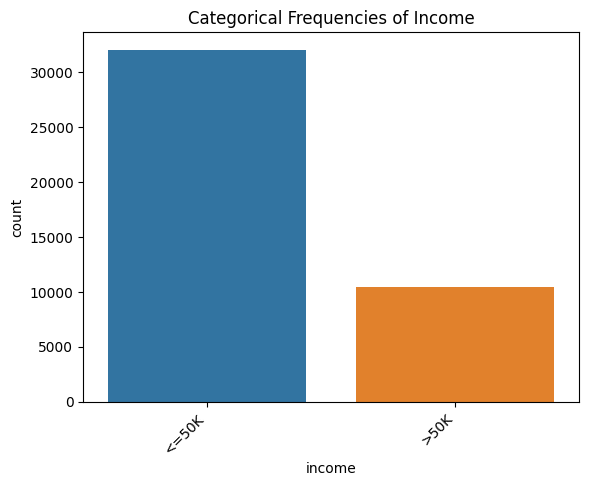

In [33]:
# Univariate countplot of Income
ax = sns.countplot(data=df, x='income')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Income");

## Explanatory Visualizations

### Correlation Heatmap

<ipython-input-34-d46fdfaaa186>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Reds');


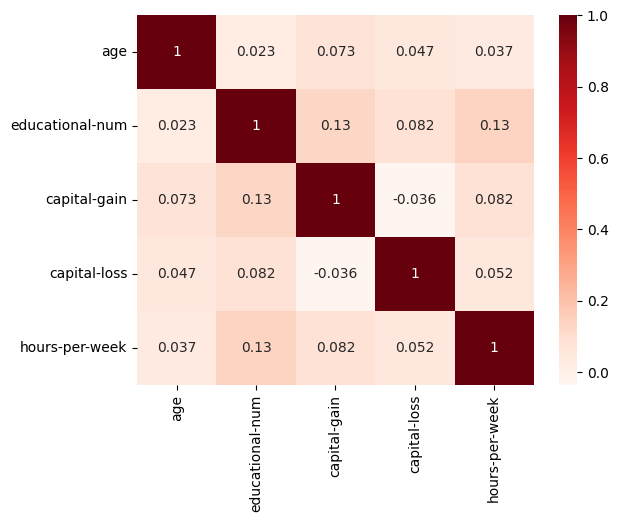

In [34]:
# Create Correlation Heatmap to Identify Strong Correlations Between Target and Features
sns.heatmap(df.corr(),annot=True,cmap='Reds');

By observing the heatmap, it appears that all the correlations between the numerical features are pretty low. However, amongst the correlations it appears that between educational-num, hours-per-week and educational-num, capital gain are the strongest.

In [35]:
# Checking how many categories in each categorical column
df.select_dtypes('object').nunique()


workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    42
income             2
dtype: int64

In [36]:
# Checking how many categories in each categorical column
df.select_dtypes('int').nunique()

age                 74
educational-num     16
capital-gain       123
capital-loss        99
hours-per-week      96
dtype: int64

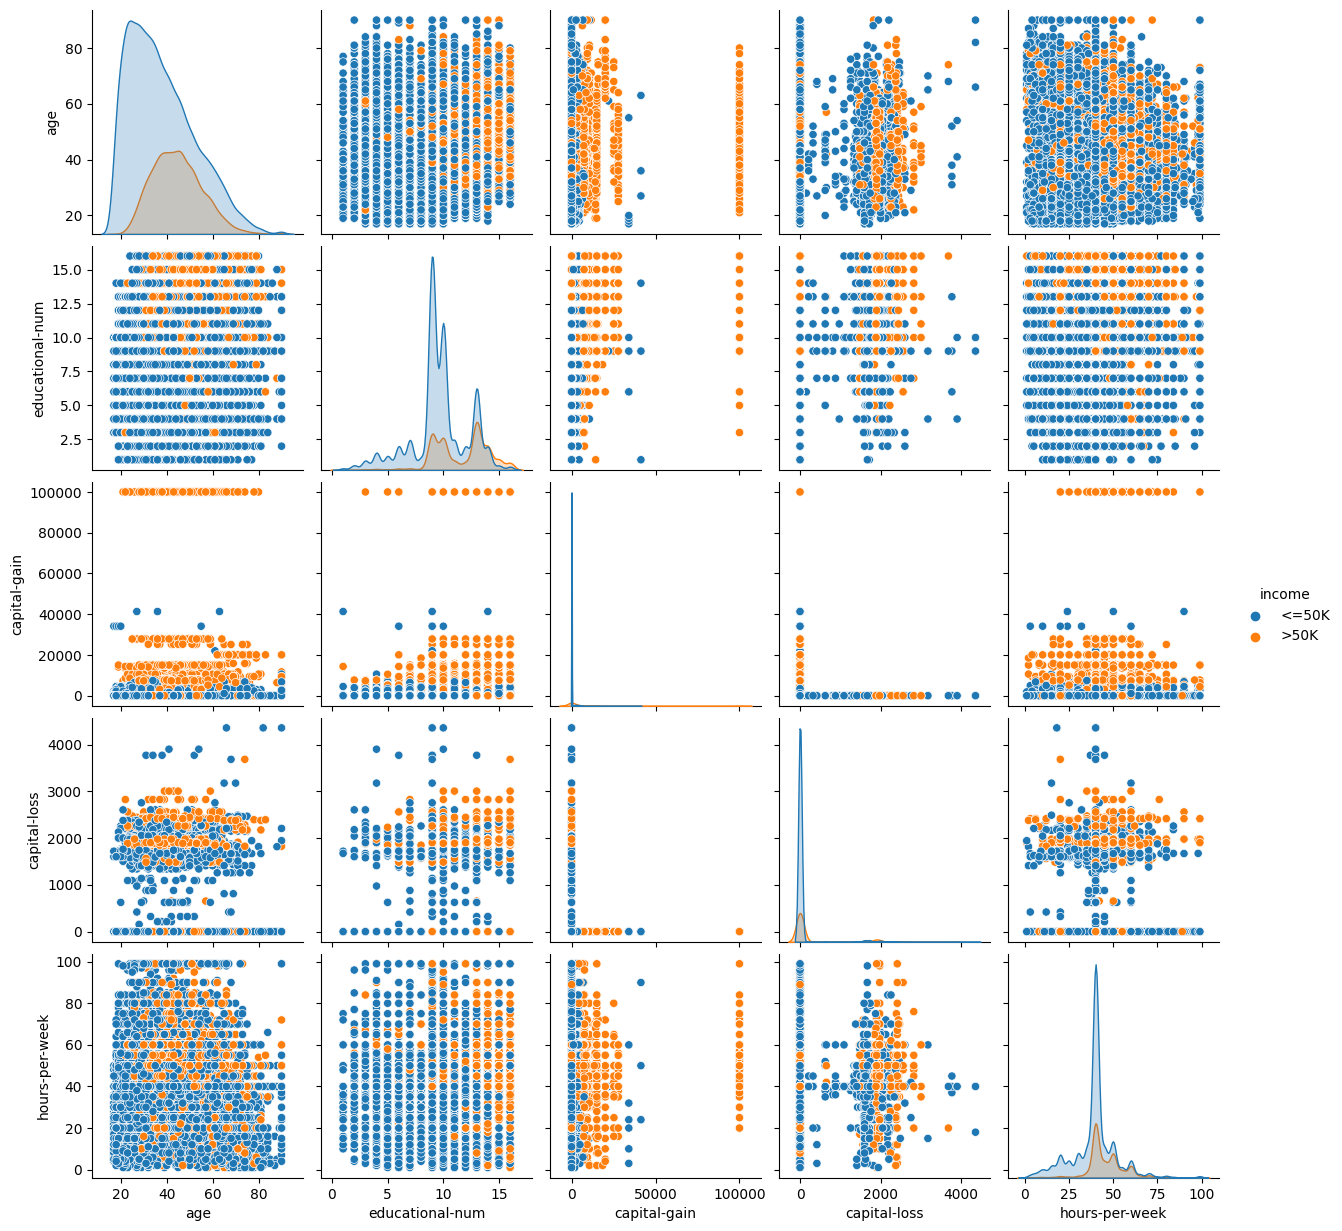

In [37]:
sns.pairplot(df, hue="income")

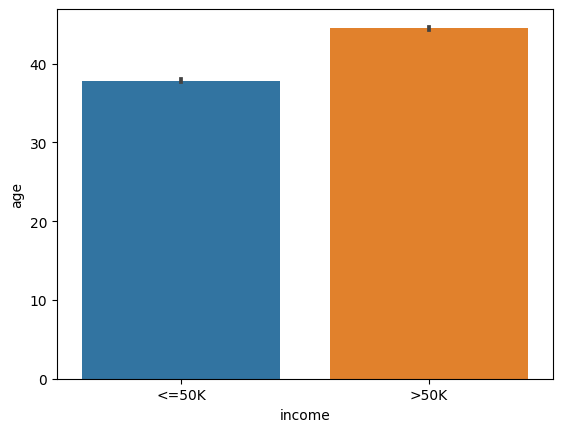

In [38]:
# Making a seaborn barplot as a starting point
ax = sns.barplot(data=df, x='income', y='age')

Based on this multivariate plot, the stakeholders, who would like to predict our target feature income, would be interested to know that those individuals who make >50k are on average older (>40 years old ) than those who make <=50k (~38 years old). This could be due to individuals who are older having more work experience, resulting in higher incomes.

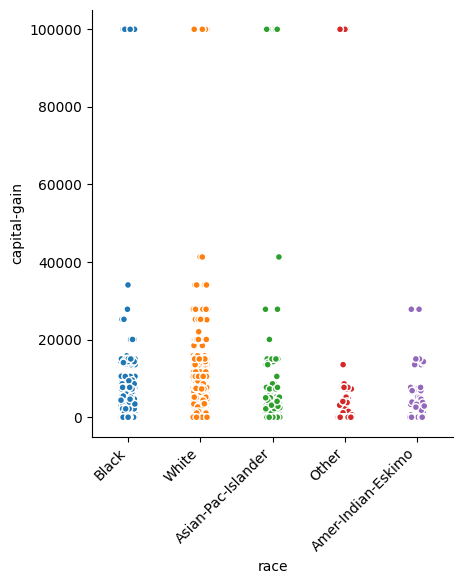

In [39]:
# Stripplot takes the same arguments as barplot
ax = sns.catplot(data=df, x='race', y='capital-gain', hue='race', edgecolor='white', linewidth = 1 )
ax.set_xticklabels(rotation=45, ha='right');

Based on this multivariate plot, stakeholders would be interested to know that amongst the labelled races, white individuals seem to have higher capital-gain than other races. Races labelled under "other" (could potentially be unidentified individuals, or individuals of many races) have the least capital gain. This could be due to many factors, such as generational wealth, lack of opportunities etc.

## Project 2 - Part 4

In [86]:
#import libraries
## Pandas
import pandas as pd
## MatplotLib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

## Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Classification Metrics
from sklearn.metrics import (ConfusionMatrixDisplay,
                              classification_report, confusion_matrix)


## Set global scikit-learn configuration
from sklearn import set_config

## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [41]:
# Create features matrix and target vector
X = df.drop(columns = ['income'])
y = df['income']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [42]:
# Checking the class balance
y_train.value_counts(normalize=True).sort_index()

<=50K    0.755361
>50K     0.244639
Name: income, dtype: float64

In [43]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')


In [44]:
# Numerical Prepprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [45]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)

## Logistic Regression Model

In [46]:
## Create an instance of the model
log_reg = LogisticRegression()
## Create a model pipeline
log_reg_pipe = make_pipeline(preprocessor, log_reg)
## Fit the model
log_reg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression())])

In [47]:
## Save the model's predictions for the train dataset
log_reg_train_preds = log_reg_pipe.predict(X_train)
## Save the model's predictions for the test dataset
log_reg_test_preds = log_reg_pipe.predict(X_test)

In [48]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     24059
        >50K       0.73      0.60      0.66      7792

    accuracy                           0.85     31851
   macro avg       0.80      0.76      0.78     31851
weighted avg       0.84      0.85      0.84     31851



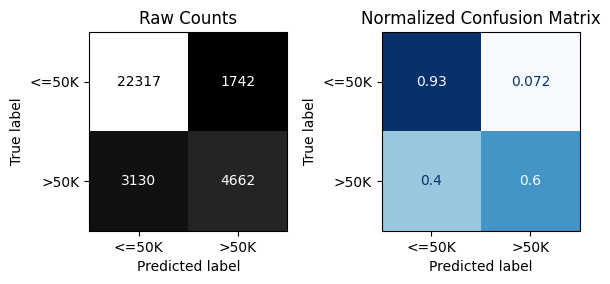


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7961
        >50K       0.74      0.59      0.66      2656

    accuracy                           0.85     10617
   macro avg       0.81      0.76      0.78     10617
weighted avg       0.84      0.85      0.84     10617



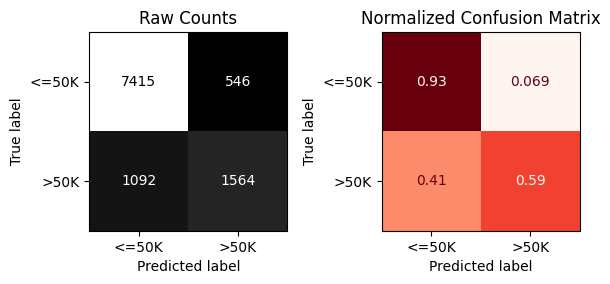

In [49]:
evaluate_classification(log_reg_pipe, X_train, y_train, X_test, y_test)

In [50]:
# Making a starter logreg pipeline
logreg_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000,
                                                       random_state=42))

In [51]:
param_grid = [{'logisticregression__solver' : ['lbfgs', 'newton-cg', 'saga'],
               'logisticregression__penalty' : ['l2', 'l1', None],
                'logisticregression__l1_ratio': [0, 0.5,
                                                 1.0],
                  'logisticregression__C': [0.1,
                                            1, 10,]}
               ]

In [52]:
# Instantiate gridsearch
gs = GridSearchCV(logreg_pipe, param_grid, verbose = 5, n_jobs = -1,
                  scoring='recall_macro', cv = 2 )
# Fit the gs on the training data only
gs.fit(X_train, y_train)
gs.best_params_

Fitting 2 folds for each of 81 candidates, totalling 162 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


{'logisticregression__C': 0.1,
 'logisticregression__l1_ratio': 0,
 'logisticregression__penalty': None,
 'logisticregression__solver': 'lbfgs'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     24059
        >50K       0.73      0.60      0.66      7792

    accuracy                           0.85     31851
   macro avg       0.80      0.76      0.78     31851
weighted avg       0.84      0.85      0.84     31851



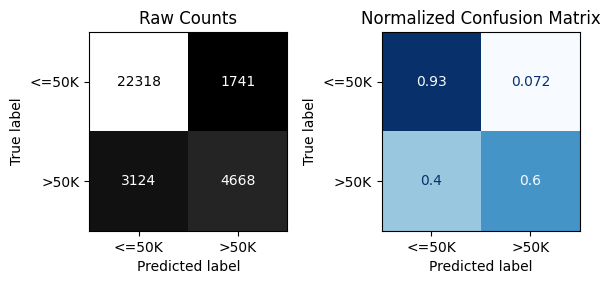


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7961
        >50K       0.74      0.59      0.65      2656

    accuracy                           0.84     10617
   macro avg       0.80      0.76      0.78     10617
weighted avg       0.84      0.84      0.84     10617



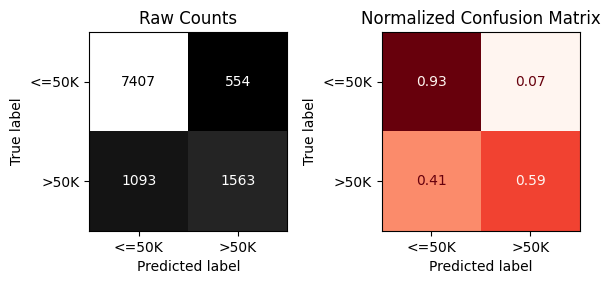

In [54]:
# Evaluate the best model
best_logreg = gs.best_estimator_
evaluate_classification(best_logreg, X_train, y_train, X_test, y_test)

Our best model, with a recall macro avg of .76, found our best hyperparameter settings for our logistic regression model would be solver='lbfgs' with penalty='none'.

## Random Forest Model

In [55]:
# Instantiate default random forest classifier model
rf_clf = RandomForestClassifier(random_state=42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf_clf)

In [56]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [57]:
## Save the model's predictions for the train dataset
train_preds = rf_pipe.predict(X_train)
## Save the model's predictions for the test dataset
test_preds = rf_pipe.predict(X_test)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.99      0.99      0.99     24059
        >50K       0.97      0.96      0.96      7792

    accuracy                           0.98     31851
   macro avg       0.98      0.97      0.98     31851
weighted avg       0.98      0.98      0.98     31851



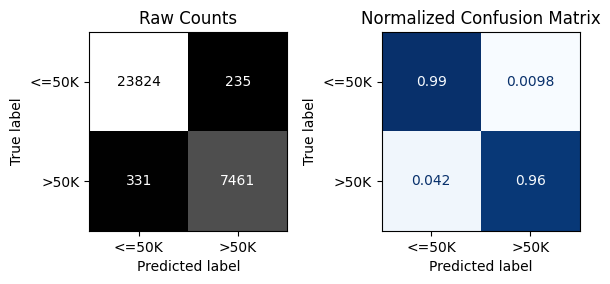


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      7961
        >50K       0.69      0.57      0.62      2656

    accuracy                           0.83     10617
   macro avg       0.78      0.74      0.76     10617
weighted avg       0.82      0.83      0.82     10617



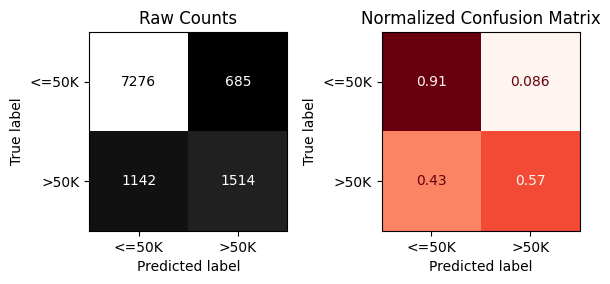

In [58]:
# Use custom function to evaluate default model
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test)

In [59]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
          'hours-per-week'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle

In [62]:
# Define param grid with options to try
params = {'randomforestclassifier__max_depth': [None,10,15],
          'randomforestclassifier__n_estimators':[10,100,150],
          'randomforestclassifier__min_samples_leaf':[2,3,4],
          'randomforestclassifier__max_features':['sqrt','log2',None],
          'randomforestclassifier__oob_score':[True,False],
          }

In [63]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 2, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleim...
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 15],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2',
                                                                  None],
                         'randomforestclassifier__min_samples_leaf': [2, 3, 4],
                         'randomforestclassifier__n_estimators': [10, 100, 150],
                         'randomforestclassifier__oob_score': [True, False]},
             verbose=1)

In [64]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__oob_score': True}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.96      0.93     24059
        >50K       0.84      0.65      0.73      7792

    accuracy                           0.88     31851
   macro avg       0.87      0.81      0.83     31851
weighted avg       0.88      0.88      0.88     31851



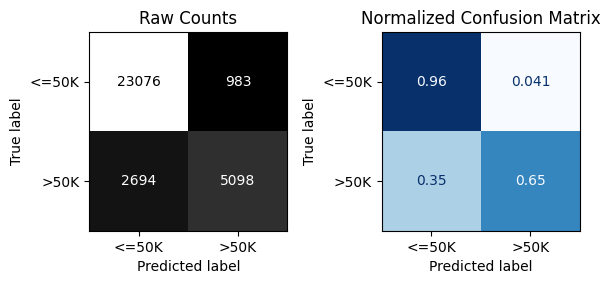


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7961
        >50K       0.80      0.59      0.68      2656

    accuracy                           0.86     10617
   macro avg       0.84      0.77      0.80     10617
weighted avg       0.86      0.86      0.85     10617



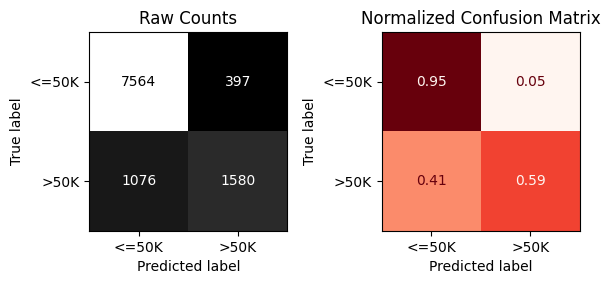

In [65]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_classification(best_rf, X_train, y_train, X_test, y_test)

Our best random forest model, found our best hyperparameter settings for our random forest model would be max_depth='15', max_features='none', min_samples_leaf = 3, n_estimators = 150 and oob_score = True.

## K-Nearest Neighbors

In [66]:
# Instantiate default KNN
knn = KNeighborsClassifier()


In [67]:
# Define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92     24059
        >50K       0.78      0.69      0.73      7792

    accuracy                           0.88     31851
   macro avg       0.84      0.81      0.83     31851
weighted avg       0.87      0.88      0.87     31851



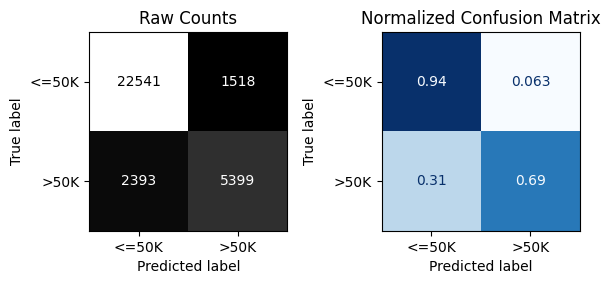


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      7961
        >50K       0.67      0.57      0.61      2656

    accuracy                           0.82     10617
   macro avg       0.77      0.74      0.75     10617
weighted avg       0.81      0.82      0.82     10617



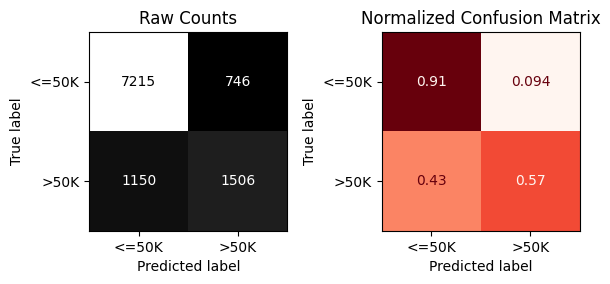

In [68]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

In [69]:
# Making every other value from the range (odd values)
nneighbors_list = list(range(1,33,2))
nneighbors_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

In [70]:
# Get list of params for the knn model pipeline
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
          'hours-per-week'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle

In [71]:
# Create param grid
params={'kneighborsclassifier__n_neighbors': nneighbors_list}

In [72]:
# Instantiate GridSearchCV
gs = GridSearchCV(knn_pipe, params, verbose=True, n_jobs=-1)
# Fit gs on training data
gs.fit(X_train, y_train)
# Obtain best param value for K
gs.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'kneighborsclassifier__n_neighbors': 23}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     24059
        >50K       0.73      0.63      0.67      7792

    accuracy                           0.85     31851
   macro avg       0.80      0.78      0.79     31851
weighted avg       0.85      0.85      0.85     31851



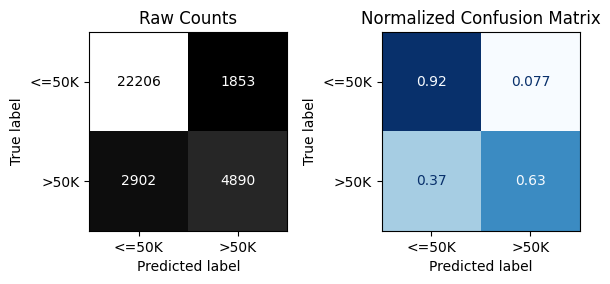


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      7961
        >50K       0.71      0.60      0.65      2656

    accuracy                           0.84     10617
   macro avg       0.79      0.76      0.77     10617
weighted avg       0.83      0.84      0.83     10617



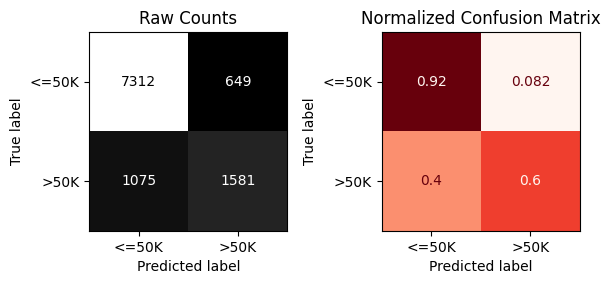

In [73]:
# Obtain complete evaluation for best performing model (k = 21)
evaluate_classification(gs.best_estimator_, X_train, y_train, X_test, y_test)

GridSearch selected n_neighbors = 23 as the best value for k.

## Model Selection

Given the three models above, I would recommend stakeholders go with the random forest machine learning model to accurately predict an individual's income. This is due to the fact that it appears amongst the three models the random forest model has the highest ratio of true positives and true negatives.

This means that this model is predicting if an individual's income is <=50k (true positive) or >50k (true negative) with the highest accuracy. Specificially, I would recommend using the tuned random forest model as it appears to have the highest accuracy amongst the six models.

I would consider the metrics most important to our business model to be our recall score and precision score for this case as we want a model that can accurately predict true positives and true negatives at the highest ratio.

**Now let's apply feature engineering techniques to see if it improves the model!**

## Applying Feature Engineering Techniques To Random Forest Model

In [97]:
# find the median age of individuals
median_age = df['age'].median()
# define a function that returns 'Elder' or 'Young' based on relation to median age
def bin_age(age):
    if age > median_age:
        return 'Elder'
    else:
        return 'Young'

In [98]:
# apply bin_fare() function to each item in the 'Fare' column
df['age'] = df['age'].apply(bin_age)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,Young,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,Young,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,Young,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,Elder,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,Young,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [99]:
# Create features matrix and target vector
X = df.drop(columns = ['income'])
y = df['income']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [100]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')


In [101]:
# Numerical Prepprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')


In [102]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)

In [103]:
# Instantiate default random forest classifier model
rf_clf = RandomForestClassifier(random_state=42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf_clf)

In [104]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [105]:
## Save the model's predictions for the train dataset
train_preds = rf_pipe.predict(X_train)
## Save the model's predictions for the test dataset
test_preds = rf_pipe.predict(X_test)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.95      0.97      0.96     24059
        >50K       0.90      0.85      0.87      7792

    accuracy                           0.94     31851
   macro avg       0.92      0.91      0.92     31851
weighted avg       0.94      0.94      0.94     31851



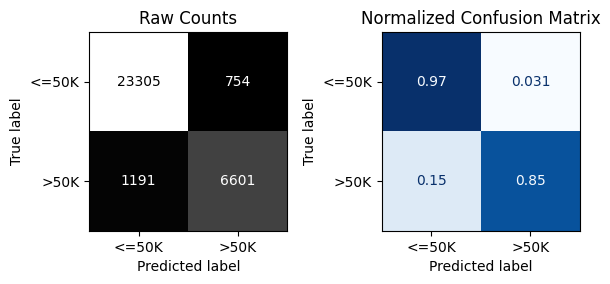


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      7961
        >50K       0.71      0.59      0.65      2656

    accuracy                           0.84     10617
   macro avg       0.79      0.76      0.77     10617
weighted avg       0.83      0.84      0.83     10617



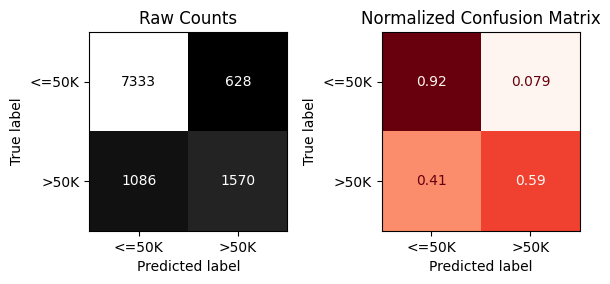

In [106]:
# Use custom function to evaluate default model
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test)

In [107]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
       

In [108]:
# Define param grid with options to try
params = {'randomforestclassifier__max_depth': [None,10,15],
          'randomforestclassifier__n_estimators':[10,100,150],
          'randomforestclassifier__min_samples_leaf':[2,3,4],
          'randomforestclassifier__max_features':['sqrt','log2',None],
          'randomforestclassifier__oob_score':[True,False],
          }

In [109]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 2, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer'...
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 15],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2',
                                                                  None],
                         'randomforestclassifier__min_samples_leaf': [2, 3, 4],
                         'randomforestclassifier__n_estimators': [10, 100, 150],
                         'randomforestclassifier__oob_score': [True, False]},
             verbose=1)

In [110]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__min_samples_leaf': 3,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__oob_score': True}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.90      0.96      0.93     24059
        >50K       0.83      0.66      0.73      7792

    accuracy                           0.88     31851
   macro avg       0.86      0.81      0.83     31851
weighted avg       0.88      0.88      0.88     31851



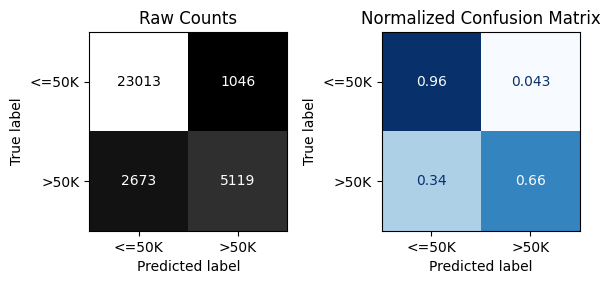


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7961
        >50K       0.79      0.60      0.68      2656

    accuracy                           0.86     10617
   macro avg       0.83      0.77      0.80     10617
weighted avg       0.85      0.86      0.85     10617



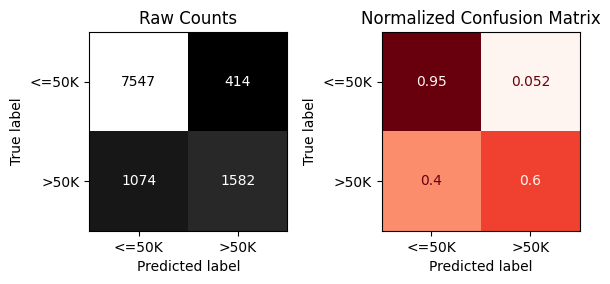

In [111]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_classification(best_rf, X_train, y_train, X_test, y_test)

It appears that using the feature engineering technique of the random forest classification model slightly improved the model performance. The true negative ratio increased from 0.59 to 0.6. The recall and accuracy appear to remain consistent. Therefore, I would recommend the Random Forest Classification model to stakeholders with the feature engineering technique of changing the numeric feature "age" to an object column dividing individuals between elder and young.